In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
import os

In [40]:
# 사용자 변경
file_path = r"C:\Users\user\Desktop\Drive파일\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. 리비전\99. 효율구하기\Efficiency_data.csv"

# 3. 파라미터 설정
#R_load = 40000000  # 40 Mohm
R_load = 500000  # 500 kohm


Total Energy: 3.494911e-08 Joules
Total Energy: 0.034949 μJ


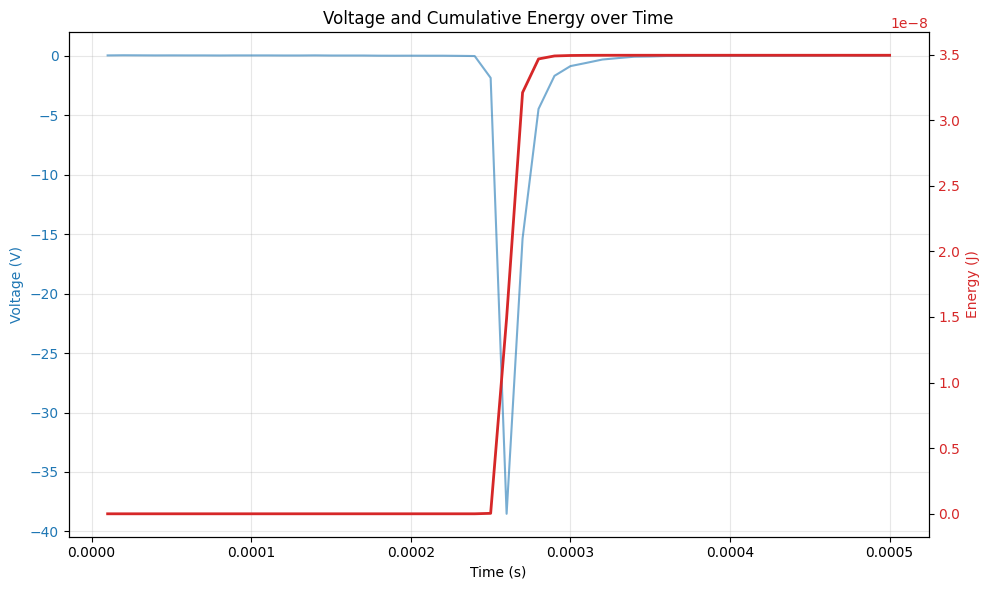

In [41]:
# 2. 데이터 불러오기
# CSV 파일의 구조에 따라 header나 column 이름을 확인해야 합니다.
# 일반적으로 첫 번째 열이 시간(Time), 두 번째 열이 전압(Voltage)이라고 가정합니다.
df = pd.read_csv(file_path)

# 데이터프레임의 컬럼명을 확인 후 적절히 수정하세요 (예: 'Time (s)', 'Voltage (V)')
# 여기서는 인덱스를 기준으로 첫 번째, 두 번째 열을 사용합니다.
time = df.iloc[:, 0].values     # 시간 데이터 (seconds)
voltage = df.iloc[:, 1].values  # 전압 데이터 (Volts)

# 4. Instantaneous Power (순시 전력) 계산: P = V^2 / R
power = (voltage ** 2) / R_load

# 5. Energy (에너지) 계산: 시간에 따른 누적 적분
# cumulative_trapezoid는 각 시점까지의 누적 에너지를 배열로 반환합니다.
cumulative_energy = cumulative_trapezoid(power, time, initial=0)

# 최종 총 에너지 (Total Energy)
total_energy = cumulative_energy[-1]

print(f"Total Energy: {total_energy:.6e} Joules")
print(f"Total Energy: {total_energy * 1e6:.6f} μJ") # 마이크로줄 단위 출력

# 6. 결과 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 전압 그래프
ax1.plot(time, voltage, color='tab:blue', alpha=0.6, label='Voltage (V)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3)

# 누적 에너지 그래프
ax2 = ax1.twinx()
ax2.plot(time, cumulative_energy, color='tab:red', linewidth=2, label='Cumulative Energy (J)')
ax2.set_ylabel('Energy (J)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Voltage and Cumulative Energy over Time')
fig.tight_layout()
plt.show()